# WINE Dataset - Multinomial Regression Using SMOTE

# 1. Install libraries

In [16]:
!pip install imblearn

In [1]:
#Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Install dataset

In [2]:
wines = pd.read_csv('wines.csv')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [3]:
wines.shape

(6497, 14)

# 3. Checking Class composition(Balanced/Unbalanced)

In [4]:
wines.quality_label.value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

F:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality_label', ylabel='count'>

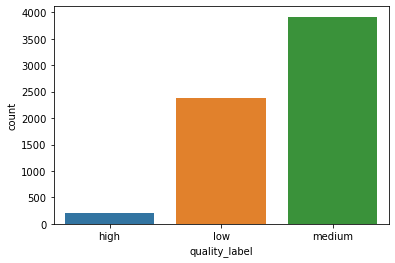

In [5]:
sns.countplot(wines['quality_label'])

# 4. Setting response (quality_label) and independent variables

In [6]:
x=wines.iloc[:,:-2]
y=wines.iloc[:,13]

# 5. Train-test split

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# 6. Multinomial Regression - Quality_label(3 class - high, medium and low)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [10]:
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
report = confusion_matrix(y_test,prediction)
print(report)

[[   0    0   69]
 [   0  678   14]
 [   4   34 1151]]


In [12]:
pd.crosstab(y_test,prediction)

col_0,high,low,medium
quality_label,,,
high,0,0,69
low,0,678,14
medium,4,34,1151


In [28]:
result = classification_report(y_test,prediction)
print(result)

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        69
         low       0.95      0.98      0.97       692
      medium       0.93      0.97      0.95      1189

    accuracy                           0.94      1950
   macro avg       0.63      0.65      0.64      1950
weighted avg       0.91      0.94      0.92      1950



# 7. SMOTE

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [18]:
x_train_smote,y_train_smote = smote.fit_sample(x_train.astype('float'),y_train)

In [20]:
from collections import Counter
print('BeforeSMOTE:',Counter(y_train))
print('AfterSMOTE:',Counter(y_train_smote))

BeforeSMOTE: Counter({'medium': 2726, 'low': 1692, 'high': 129})
AfterSMOTE: Counter({'medium': 2726, 'low': 2726, 'high': 2726})


# 8. Rebuild the model after SMOTE

In [21]:
lr.fit(x_train_smote,y_train_smote)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = lr.predict(x_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
report = confusion_matrix(y_test,y_pred)
print(report)

[[  61    0    8]
 [   0  673   19]
 [  58   26 1105]]


In [25]:
pd.crosstab(y_test,y_pred)

col_0,high,low,medium
quality_label,,,
high,61,0,8
low,0,673,19
medium,58,26,1105


In [27]:
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

        high       0.51      0.88      0.65        69
         low       0.96      0.97      0.97       692
      medium       0.98      0.93      0.95      1189

    accuracy                           0.94      1950
   macro avg       0.82      0.93      0.86      1950
weighted avg       0.96      0.94      0.95      1950

